# **Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.metrics import root_mean_squared_log_error as rmsle, mean_squared_log_error as msle


# **Automotive**

In [2]:
with open("AUTOMOTIVE_pred.pkl","rb") as f:
    auto_pred = pickle.load(f)

auto_pred

,date,store_nbr,value,prediction
0,2017-08-01,25,4.0,2
1,2017-08-02,25,0.0,2
2,2017-08-03,25,9.0,4
3,2017-08-04,25,5.0,3
4,2017-08-05,25,3.0,2
...,...,...,...,...
805,2017-08-11,52,17.0,17
806,2017-08-12,52,13.0,12
807,2017-08-13,52,21.0,21
808,2017-08-14,52,5.0,4


In [3]:
auto_pred["prediction"] = auto_pred["prediction"].astype("int")

In [4]:
auto_pred

,date,store_nbr,value,prediction
0,2017-08-01,25,4.0,2
1,2017-08-02,25,0.0,2
2,2017-08-03,25,9.0,4
3,2017-08-04,25,5.0,3
4,2017-08-05,25,3.0,2
...,...,...,...,...
805,2017-08-11,52,17.0,17
806,2017-08-12,52,13.0,12
807,2017-08-13,52,21.0,21
808,2017-08-14,52,5.0,4


In [5]:
def comparison(df,item):
    sns.lineplot(x="date", y="value", data=df, color="blue", label=f"Sales {item}")
    sns.lineplot(x="date", y="prediction", data=df, color="red", label =f"Predictions {item}")
    #plt.legend([f"Sales {item}",f"Predictions sales {item}"])
    plt.xticks(rotation=45)
    plt.show()

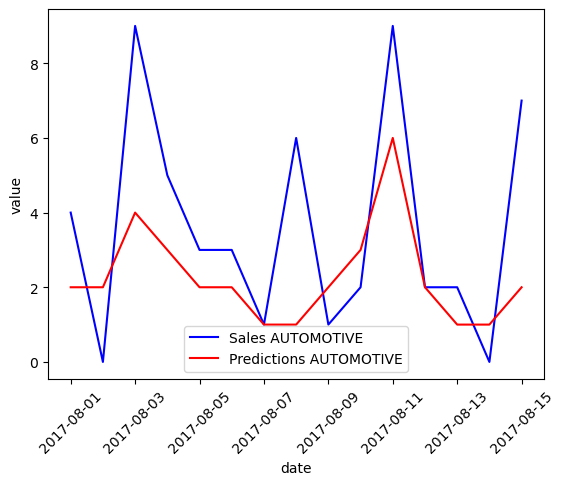

In [6]:
auto_25 = auto_pred.loc[auto_pred["store_nbr"] == 25].copy()
comparison(auto_25,"AUTOMOTIVE")

In [7]:
auto_52 = auto_pred.loc[auto_pred["store_nbr"] == 52]
auto_52
#comparison(auto_52,"AUTOMOTIVE")

,date,store_nbr,value,prediction
795,2017-08-01,52,5.0,4
796,2017-08-02,52,19.0,19
797,2017-08-03,52,19.0,18
798,2017-08-04,52,9.0,9
799,2017-08-05,52,15.0,15
800,2017-08-06,52,24.0,24
801,2017-08-07,52,5.0,4
802,2017-08-08,52,8.0,7
803,2017-08-09,52,11.0,10
804,2017-08-10,52,7.0,6


In [8]:
sales = pd.read_csv("C:/Users/Angelique/OneDrive/Bureau/Test folder/Kaggle/store_sales/train.csv")
sales["date"] = pd.to_datetime(sales["date"])
auto_52_aug = sales.loc[(sales["family"] == "AUTOMOTIVE")&(sales["store_nbr"] == 52)&(sales["date"] >= "2017-08-01")]
auto_52_aug

,id,date,store_nbr,family,sales,onpromotion
2975709,2975709,2017-08-01,52,AUTOMOTIVE,5.0,0
2977491,2977491,2017-08-02,52,AUTOMOTIVE,19.0,0
2979273,2979273,2017-08-03,52,AUTOMOTIVE,19.0,0
2981055,2981055,2017-08-04,52,AUTOMOTIVE,9.0,0
2982837,2982837,2017-08-05,52,AUTOMOTIVE,15.0,0
2984619,2984619,2017-08-06,52,AUTOMOTIVE,24.0,0
2986401,2986401,2017-08-07,52,AUTOMOTIVE,5.0,0
2988183,2988183,2017-08-08,52,AUTOMOTIVE,8.0,0
2989965,2989965,2017-08-09,52,AUTOMOTIVE,11.0,0
2991747,2991747,2017-08-10,52,AUTOMOTIVE,7.0,0


In [9]:
auto_52["value"] = auto_52_aug["sales"].values

C:\Users\Angelique\AppData\Local\Temp\ipykernel_19588\805662738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_52["value"] = auto_52_aug["sales"].values


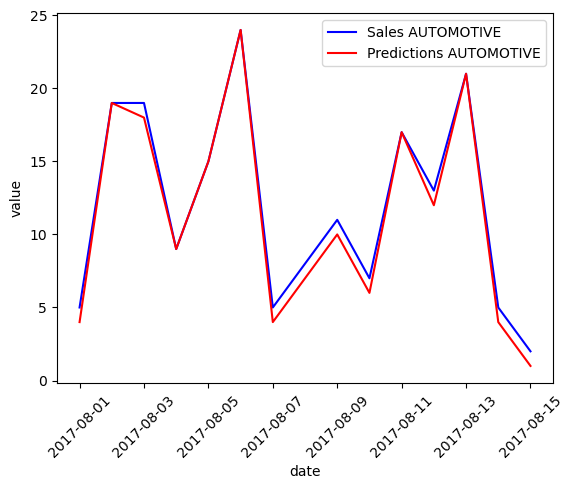

In [10]:
comparison(auto_52,"AUTOMOTIVE")

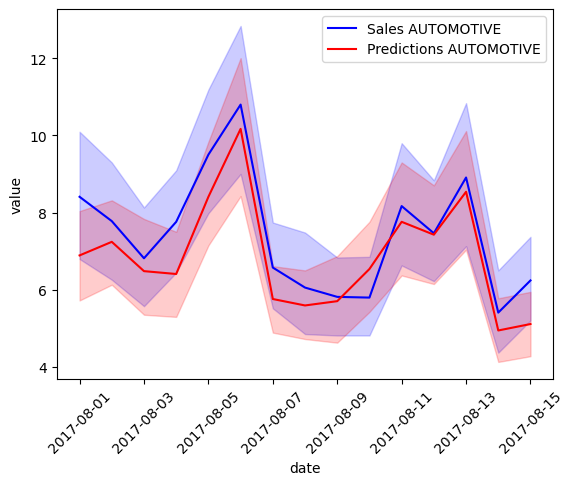

In [11]:
comparison(auto_pred,"AUTOMOTIVE")

# **Baby care**

In [12]:
def open_pred(pkl_file):
    with open(pkl_file,"rb") as f:
        return pickle.load(f)

In [13]:
babyCare_pred = open_pred("BABY CARE_pred.pkl")
babyCare_pred

,date,store_nbr,value,prediction
0,2017-08-01,25,0.0,0
1,2017-08-02,25,0.0,0
2,2017-08-03,25,0.0,0
3,2017-08-04,25,1.0,0
4,2017-08-05,25,0.0,0
...,...,...,...,...
805,2017-08-11,52,0.0,0
806,2017-08-12,52,0.0,0
807,2017-08-13,52,0.0,0
808,2017-08-14,52,0.0,0


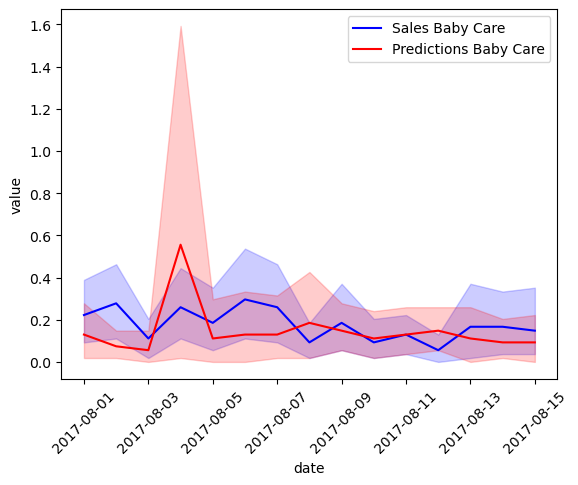

In [14]:
comparison(babyCare_pred,"Baby Care")

# **RMSLE for all stores per item**

## **Automotive**

In [15]:
auto_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        810 non-null    datetime64[ns]
 1   store_nbr   810 non-null    int64         
 2   value       810 non-null    float64       
 3   prediction  810 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 22.3 KB


In [16]:
n_stores = len(auto_pred["store_nbr"].unique())
auto_pred["sle"] = (np.log(auto_pred["value"] + 1) - np.log(auto_pred["prediction"] + 1)) ** 2

In [17]:
auto_pred["sle"].describe()

count    810.000000
mean       0.221431
std        0.382741
min        0.000000
25%        0.017831
50%        0.082761
75%        0.260943
max        4.827796
Name: sle, dtype: float64

In [18]:
auto_metrics = {"date":[], "rmsle":[], "sem":[]}
date_list = list(auto_pred["date"].unique())
for date in date_list:
    df = auto_pred.loc[auto_pred["date"] == date].copy()
    auto_metrics["date"].append(date)
    auto_metrics["rmsle"].append(rmsle(df["value"],df["prediction"]))
    auto_metrics["sem"].append(np.sqrt(df["sle"].std()/np.sqrt(len(df))))

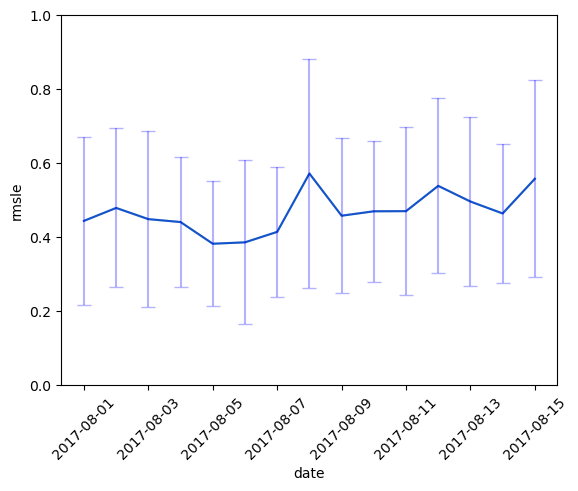

In [19]:
sns.lineplot(x="date",y="rmsle", data=auto_metrics)
plt.errorbar(x=auto_metrics["date"], y=auto_metrics["rmsle"], \
             yerr=auto_metrics["sem"], color="blue", alpha=0.3, capsize=5)
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

In [20]:
def rmsle_item(df):
    df["sle"] = (np.log(df["prediction"] + 1) - np.log(df["value"] + 1)) ** 2
    n_stores = len(df["store_nbr"].unique())
    dates_list = list(df["date"].unique())
    metrics = {"date":[], "rmsle":[], "sem":[]}
    for date in dates_list:
        df_item = df.loc[df["date"] == date, ["value","prediction","sle"]].copy()
        metrics["date"].append(date)
        metrics["rmsle"].append(rmsle(df_item["value"],df_item["prediction"]))
        metrics["sem"].append(np.sqrt(df_item["sle"].std()/np.sqrt(n_stores)))
    return metrics

In [21]:
AUTO_metrics = rmsle_item(auto_pred)

## **Baby Care**

In [22]:
BABYCARE_rmsle = rmsle_item(babyCare_pred)

In [23]:
def rmsle_graph(df,item):
    sns.lineplot(x="date",y="rmsle", data=df)
    plt.errorbar(x=df["date"], y=df["rmsle"], \
                 yerr=df["sem"], color="blue", alpha=0.3, capsize=5)
    plt.ylim(0,1)
    plt.title(f"RMSLE for {item}")
    plt.xticks(rotation=45)
    plt.show()

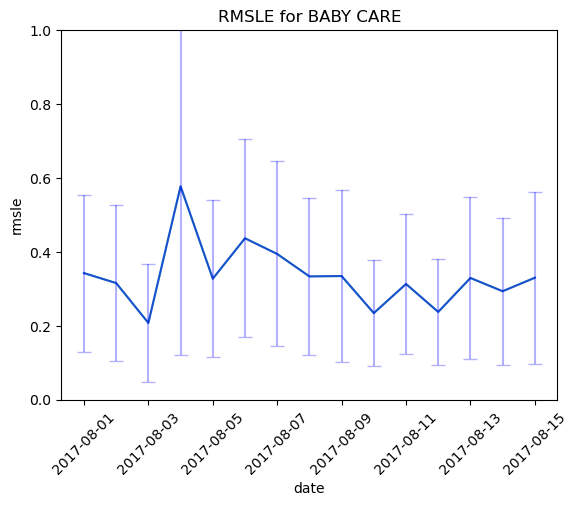

In [24]:
rmsle_graph(BABYCARE_rmsle,"BABY CARE")

## **GROCERY I**

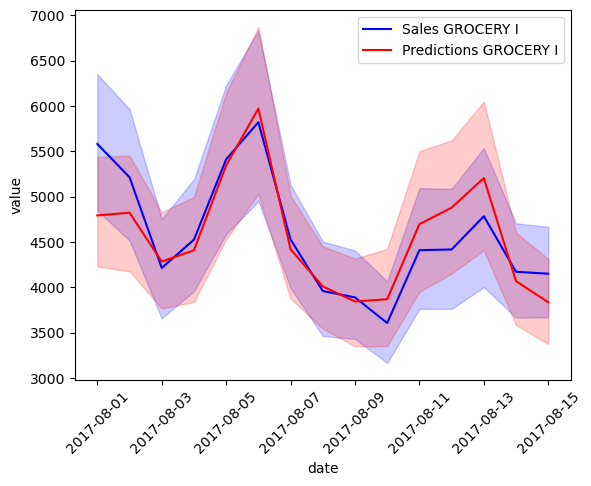

In [25]:
grocery_I = open_pred("GROCERY I_pred.pkl")
comparison(grocery_I,"GROCERY I")

In [26]:
grocery_I["prediction"].describe()

count      810.000000
mean      4564.976543
std       2487.502966
min       -482.000000
25%       2911.000000
50%       3994.500000
75%       5489.500000
max      15029.000000
Name: prediction, dtype: float64

In [27]:
grocery_I.loc[grocery_I["prediction"] < 0]

,date,store_nbr,value,prediction
224,2017-08-15,14,3789.0,-482


Why do I have a negative value here?

In [28]:
groceryI_aug14 = grocery_I.loc[grocery_I["date"] < "2017-08-15"]

C:\Users\Angelique\AppData\Local\Temp\ipykernel_19588\3916964957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sle"] = (np.log(df["prediction"] + 1) - np.log(df["value"] + 1)) ** 2


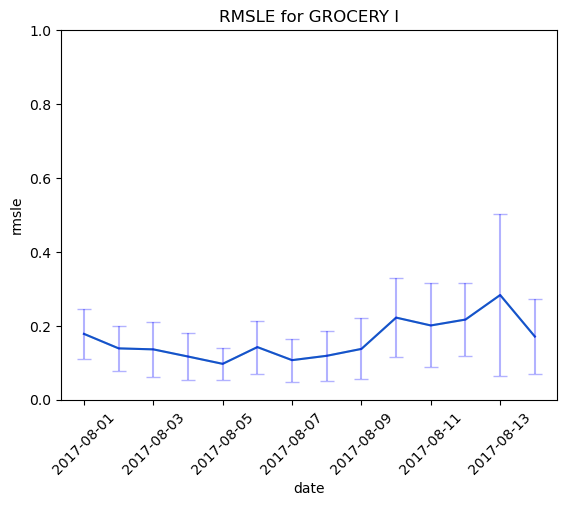

In [29]:
groceryI_rmsle = rmsle_item(groceryI_aug14)
rmsle_graph(groceryI_rmsle,"GROCERY I")